In [1]:
import pandas as pd
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

In [2]:

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\georg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:

# Load the datasets
news_df = pd.read_csv('./data/us_equities_news_dataset.csv')
stock_df = pd.read_csv('./data/NVDA.csv')

In [5]:
'''
# Convert the date columns to datetime format for matching
news_df['Date'] = pd.to_datetime(news_df['release_date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Merge news data with stock prices based on publication date
merged_df = pd.merge(news_df, stock_df, on='Date', how='inner')

# Filter to keep only articles that have matching stock data
filtered_df = merged_df[['content', 'Open', 'Close', 'Date']]

# Label the target variable based on the opening and closing prices
filtered_df['target'] = np.where(filtered_df['Open'] > filtered_df['Close'], 0, 1)

# Display the first few rows to verify the merging and labeling
print("\nFiltered and Labeled Data:")
print(filtered_df.head())
'''

'\n# Convert the date columns to datetime format for matching\nnews_df[\'Date\'] = pd.to_datetime(news_df[\'release_date\'])\nstock_df[\'Date\'] = pd.to_datetime(stock_df[\'Date\'])\n\n# Merge news data with stock prices based on publication date\nmerged_df = pd.merge(news_df, stock_df, on=\'Date\', how=\'inner\')\n\n# Filter to keep only articles that have matching stock data\nfiltered_df = merged_df[[\'content\', \'Open\', \'Close\', \'Date\']]\n\n# Label the target variable based on the opening and closing prices\nfiltered_df[\'target\'] = np.where(filtered_df[\'Open\'] > filtered_df[\'Close\'], 0, 1)\n\n# Display the first few rows to verify the merging and labeling\nprint("\nFiltered and Labeled Data:")\nprint(filtered_df.head())\n'

In [6]:
# Sample keywords related to NVIDIA and associated companies
nvidia_keywords = [
    'NVDA', 'NVIDIA', 'NIO', 'UBER', 'AMZN', 'AMAZON', 'TESLA', 'AI', 'GPU', 'GRAPHICS',
    'CHIP', 'SEMICONDUCTOR', 'AUTONOMOUS', 'DRIVING', 'DEEP LEARNING', 'MACHINE LEARNING'
]

# Compile a regex pattern from the keywords list
nvidia_pattern = '|'.join(nvidia_keywords)  # Combines the keywords into a regex pattern

# Filter articles where the content or ticker column contains any of the keywords
nvidia_related_articles = news_df[
    news_df['content'].str.contains(nvidia_pattern, case=False, na=False) |
    news_df['ticker'].str.contains(nvidia_pattern, case=False, na=False)
]

# Display the count of NVIDIA-related articles
print(f"\nTotal NVIDIA-related articles found: {nvidia_related_articles.shape[0]}")

# Convert the date columns to datetime format for matching
nvidia_related_articles['Date'] = pd.to_datetime(nvidia_related_articles['release_date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Merge filtered news data with stock prices based on publication date
merged_df = pd.merge(nvidia_related_articles, stock_df, on='Date', how='inner')

# Filter to keep only articles that have matching stock data
filtered_df = merged_df[['content', 'Open', 'Close', 'Date']]

# Label the target variable based on the opening and closing prices
filtered_df['target'] = np.where(filtered_df['Open'] > filtered_df['Close'], 0, 1)

# Display the first few rows to verify the merging and labeling
print("\nFiltered and Labeled Data:")
print(filtered_df.head())


Total NVIDIA-related articles found: 209131


C:\Users\georg\AppData\Local\Temp\ipykernel_48220\3343991108.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_related_articles['Date'] = pd.to_datetime(nvidia_related_articles['release_date'])



Filtered and Labeled Data:
                                             content     Open    Close  \
0  What s happening\nShares of Chinese electric c...  6.19475  6.13925   
1  Gainers  NIO  NYSE NIO   14   Village Farms In...  6.19475  6.13925   
2  Cemtrex  NASDAQ CETX   85  after FY results \n...  6.19475  6.13925   
3  aTyr Pharma  NASDAQ LIFE   63  on Kyorin Pharm...  5.80800  5.92650   
4  Gainers  NIO  NYSE NIO   14   Meritor  NYSE MT...  5.77250  5.88250   

        Date  target  
0 2020-01-15       0  
1 2020-01-15       0  
2 2020-01-15       0  
3 2020-01-06       1  
4 2019-12-31       1  


C:\Users\georg\AppData\Local\Temp\ipykernel_48220\3343991108.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target'] = np.where(filtered_df['Open'] > filtered_df['Close'], 0, 1)


In [7]:
# Sample keywords related to NVIDIA and associated companies
nvidia_keywords = [
    'NVDA', 'NVIDIA']

# Compile a regex pattern from the keywords list
nvidia_pattern = '|'.join(nvidia_keywords)  # Combines the keywords into a regex pattern

# Filter articles where the content or ticker column contains any of the keywords
nvidia_related_articles = news_df[
    news_df['content'].str.contains(nvidia_pattern, case=False, na=False) |
    news_df['ticker'].str.contains(nvidia_pattern, case=False, na=False)
]

# Display the count of NVIDIA-related articles
print(f"\nTotal NVIDIA-related articles found: {nvidia_related_articles.shape[0]}")

# Convert the date columns to datetime format for matching
nvidia_related_articles['Date'] = pd.to_datetime(nvidia_related_articles['release_date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Merge filtered news data with stock prices based on publication date
merged_df = pd.merge(nvidia_related_articles, stock_df, on='Date', how='inner')

# Filter to keep only articles that have matching stock data
filtered_df = merged_df[['content', 'Open', 'Close', 'Date']]

# Label the target variable based on the opening and closing prices
filtered_df['target'] = np.where(filtered_df['Open'] > filtered_df['Close'], 0, 1)

# Display the first few rows to verify the merging and labeling
print("\nFiltered and Labeled Data:")
print(filtered_df.head())


Total NVIDIA-related articles found: 3460

Filtered and Labeled Data:
                                             content     Open    Close  \
0  ECB Effects\nThe move in the euro was huge  fa...  3.77750  3.73150   
1  6 Stocks To Watch  March 6 Trading Session\nSt...  3.90400  3.80125   
2  Investing com   A rout in Apple and Facebook  ...  4.04475  3.61750   
3  With 4 500 companies bringing their innovation...  6.19300  6.22325   
4  With 4 500 companies bringing their innovation...  6.18325  6.10800   

        Date  target  
0 2019-03-07       0  
1 2019-03-06       0  
2 2018-11-19       0  
3 2020-01-16       1  
4 2020-01-10       0  


C:\Users\georg\AppData\Local\Temp\ipykernel_48220\3072464797.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_related_articles['Date'] = pd.to_datetime(nvidia_related_articles['release_date'])
C:\Users\georg\AppData\Local\Temp\ipykernel_48220\3072464797.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target'] = np.where(filtered_df['Open'] > filtered_df['Close'], 0, 1)


In [8]:

# Proceed with the rest of your analysis using filtered_df
# Basic descriptive statistics for the news dataset
num_articles = filtered_df.shape[0]
average_words_per_article = filtered_df['content'].apply(lambda x: len(str(x).split())).mean()
print(f'The number of articles before filtering is: {news_df.shape[0]}')
print(f"The number of articles after filtering is: {num_articles}")
print(f"The average amount of words per article is: {average_words_per_article}")

The number of articles before filtering is: 221513
The number of articles after filtering is: 3111
The average amount of words per article is: 684.115075538412


In [9]:
# Initialize the stemmer
stemmer = PorterStemmer()


In [10]:

# Tokenize content for word frequency analysis
filtered_df.loc[:, 'text_length'] = filtered_df['content'].apply(lambda x: len(str(x).split()))

C:\Users\georg\AppData\Local\Temp\ipykernel_48220\501310989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'text_length'] = filtered_df['content'].apply(lambda x: len(str(x).split()))


In [11]:
# Tokenize content for word frequency analysis
filtered_df.loc[:, 'processed_text'] = filtered_df['content'].apply(lambda x: word_tokenize(str(x).lower()))

C:\Users\georg\AppData\Local\Temp\ipykernel_48220\2249958047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'processed_text'] = filtered_df['content'].apply(lambda x: word_tokenize(str(x).lower()))


In [12]:
# Remove stopwords and punctuation for better NLP insights
stop_words = set(stopwords.words('english'))
# Remove stopwords, punctuation, and apply stemming
filtered_df.loc[:, 'filtered_text'] = filtered_df['processed_text'].apply(
    lambda words: [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
)

C:\Users\georg\AppData\Local\Temp\ipykernel_48220\2561342159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'filtered_text'] = filtered_df['processed_text'].apply(


In [13]:
# Join the filtered words back into strings for TF-IDF
filtered_df.loc[:, 'filtered_text_str'] = filtered_df['filtered_text'].apply(lambda x: ' '.join(x))

C:\Users\georg\AppData\Local\Temp\ipykernel_48220\3162904991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'filtered_text_str'] = filtered_df['filtered_text'].apply(lambda x: ' '.join(x))


In [14]:
# Frequency analysis of the most common words
all_words = [word for content in filtered_df['filtered_text'] for word in content]
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(50)

# Display the most common words in the news dataset
print("\nTop 50 most common words in the news articles (after stop word removal):")
print(most_common_words)


Top 50 most common words in the news articles (after stop word removal):
[('year', 14216), ('compani', 13370), ('stock', 13285), ('nasdaq', 13264), ('zack', 9647), ('market', 9251), ('earn', 8734), ('nvidia', 8089), ('quarter', 7579), ('share', 7469), ('revenu', 6490), ('trade', 6483), ('growth', 6354), ('expect', 6322), ('report', 5836), ('billion', 5625), ('also', 5510), ('nyse', 5420), ('technolog', 5240), ('estim', 5042), ('invest', 4788), ('like', 4624), ('new', 4551), ('rank', 4514), ('investor', 4410), ('million', 4364), ('last', 4154), ('industri', 4135), ('inc', 4013), ('price', 3935), ('buy', 3892), ('gain', 3691), ('u', 3647), ('week', 3637), ('day', 3619), ('p', 3539), ('nvda', 3537), ('time', 3462), ('one', 3421), ('product', 3421), ('data', 3380), ('high', 3302), ('top', 3209), ('strong', 3172), ('current', 3160), ('per', 3149), ('chip', 3111), ('perform', 3095), ('increas', 3054), ('see', 3014)]


In [15]:
# TF-IDF Representation of Documents using the processed and filtered text
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Reduced max features
tfidf_matrix = vectorizer.fit_transform(filtered_df['filtered_text_str'])

In [16]:
# Train a linear classifier (e.g., Logistic Regression) on the TF-IDF matrix
clf = LogisticRegression(max_iter=1000)
clf.fit(tfidf_matrix, filtered_df['target'])

LogisticRegression(max_iter=1000)

In [17]:
def print_top_features(vectorizer, coef):
    """Prints features with the highest coefficient values for binary classification."""
    feature_names = vectorizer.get_feature_names_out()
    
    # Top 20 features with the most negative coefficients (indicative of Class 0)
    top_features_class_0 = np.argsort(coef)[:20]
    print("\nTop 20 Words Indicative of Class 0 (Stock Price Down):")
    print(" ".join(feature_names[j] for j in top_features_class_0))
    
    # Top 20 features with the most positive coefficients (indicative of Class 1)
    top_features_class_1 = np.argsort(coef)[-20:]
    print("\nTop 20 Words Indicative of Class 1 (Stock Price Up):")
    print(" ".join(feature_names[j] for j in top_features_class_1))
    
    return top_features_class_0, top_features_class_1

# Extract the coefficients from the classifier
coef = clf.coef_[0]

# Print the most informative features and get the indices for visualization
top_features_class_0, top_features_class_1 = print_top_features(vectorizer, coef)


Top 20 Words Indicative of Class 0 (Stock Price Down):
fell beat cent signific test work today project expand net declin fear stream pay gross soar use grow rise appli

Top 20 Words Indicative of Class 1 (Stock Price Up):
micro video oper pressur processor chip session total biggest deliv center ep global electron mark trader remain esp cash rose


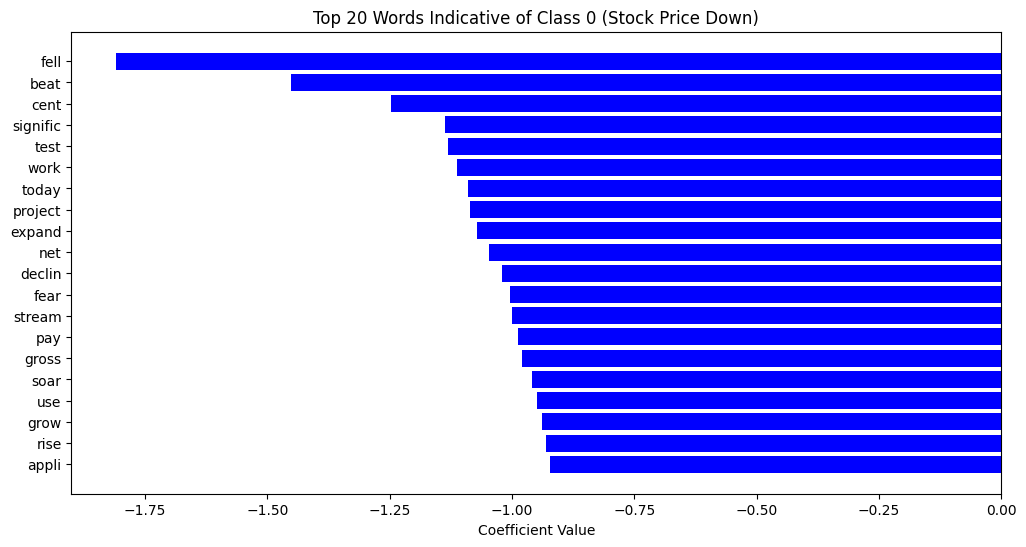

In [18]:

# Visualize the top features for Class 0 (Stock Price Down)
plt.figure(figsize=(12, 6))
plt.barh([vectorizer.get_feature_names_out()[i] for i in top_features_class_0], coef[top_features_class_0], color='blue')
plt.title('Top 20 Words Indicative of Class 0 (Stock Price Down)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()



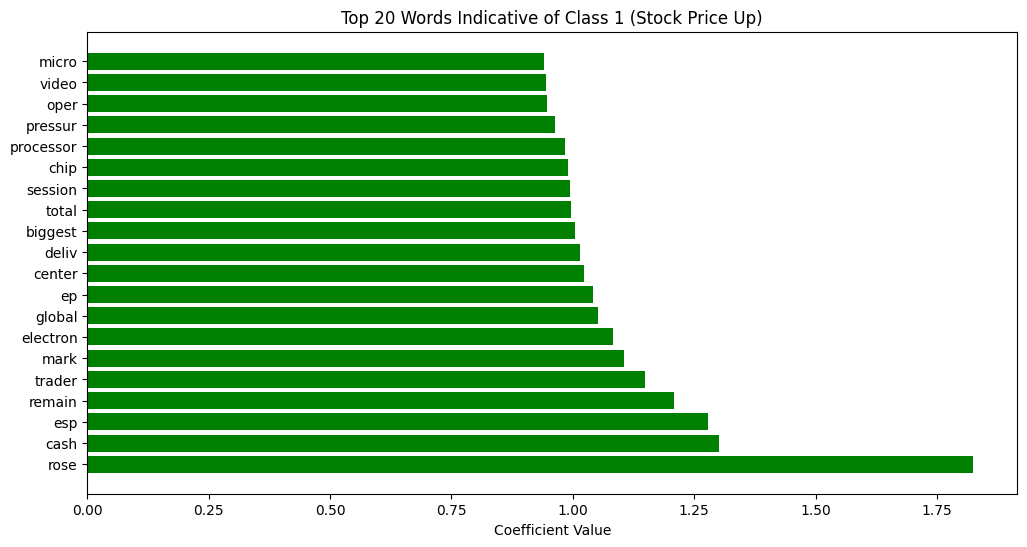

In [19]:
# Visualize the top features for Class 1 (Stock Price Up)
plt.figure(figsize=(12, 6))
plt.barh([vectorizer.get_feature_names_out()[i] for i in top_features_class_1], coef[top_features_class_1], color='green')
plt.title('Top 20 Words Indicative of Class 1 (Stock Price Up)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# Compute cosine similarity matrix, which measures the similarity between documents
# Source: https://medium.com/@anurag-jain/tf-idf-vectorization-with-cosine-similarity-eca3386d4423

similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert similarity matrix to a DataFrame for easier handling
similarity_df = pd.DataFrame(similarity_matrix)

In [24]:
# Find indices of the most and least similar documents (excluding self-similarity)
np.fill_diagonal(similarity_matrix, 0)
most_similar_indices = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
least_similar_indices = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)

In [25]:

# Inspect the most similar documents
similar_doc_1 = news_df.iloc[most_similar_indices[0]]
similar_doc_2 = news_df.iloc[most_similar_indices[1]]

print("\nMost Similar Documents:\n")
print("Document 1:")
print(similar_doc_1['content'])
print("\nDocument 2:")
print(similar_doc_2['content'])


Most Similar Documents:

Document 1:
Screen Criteria  All of these Electronics stocks have seen revenues rise faster than accounts receivables during the most recent quarter  Ranking of This List  Contextuall com tracks the performance of a wide variety of company characteristics  Based on performance data over the last month  this list below is currently ranked 281 out of 284 lists  In other words  the company characteristics described below have outperformed 1 06  of lists in Contextuall s coverage universe  Average Weekly Returns  Average 1 Week Return of All Stocks Mentioned Below   1 99  Average 1 Month Return of All Stocks Mentioned Below  2 41  Analysis of List Alpha  Number of Stocks in This List Generating Excess Return vs  SP500  Beta Adjusted Over Last Week   2 out of 4  50 0   Number of Stocks in This List Generating Excess Return vs  SP500  Beta Adjusted Over Last Month   0 out of 4  0 0    List sorted by monthly performance  from best to worst  1  Power One Inc   PWER   

In [26]:

# Inspect the least similar documents
dissimilar_doc_1 = news_df.iloc[least_similar_indices[0]]
dissimilar_doc_2 = news_df.iloc[least_similar_indices[1]]

print("\n\nMost Dissimilar Documents:\n")
print("Document 1:")
print(dissimilar_doc_1['content'])
print("\nDocument 2:")
print(dissimilar_doc_2['content'])





Most Dissimilar Documents:

Document 1:
What s happening
Shares of Chinese electric car maker NIO  NYSE NIO  were sharply higher on Wednesday morning after a Chinese business news outlet reported that the cash strapped company had secured new financing from a major automaker  As of 12 p m  EST  NIO s American depositary shares  ADS  were up about 16  from Tuesday s closing price 
So what
According to a report from Chinese business news site Sina Finance that cites a person familiar with the matter  NIO will soon receive a cash infusion of about  1 billion from Guangzhou based GAC Group  OTC GNZUF    At press time  neither NIO nor GAC had confirmed    or denied    the report  

GAC is one of China s big domestic automakers  It has significant joint ventures with Honda Motor and Fiat Chrysler Automobiles  among others  If GAC has in fact decided to make a major investment in NIO    and as of now  neither company has confirmed the report    then NIO s future is bright  
That s an import

In [69]:
#Source: https://scikit-learn.org/stable/modules/feature_extraction.html#vectorizing-a-large-text-corpus-with-the-hashing-trick
# Source: https://stackoverflow.com/questions/17536394/how-can-i-reduce-memory-usage-of-scikit-learn-vectorizers
# Reasoning is that TFIDF Vectorizer create very sparse matrix, which resulted in a 284GB matrix that needed to be held in memory in order to process it.
# Initialize HashingVectorizer with a reasonable number of features
hash_vectorizer = HashingVectorizer(n_features=2**10, alternate_sign=False, norm=None)

# Transform the text data into hashed feature space using the string format
hashed_matrix = hash_vectorizer.transform(filtered_df['filtered_text_str'])

# Apply TfidfTransformer to add IDF weighting
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(hashed_matrix)

# Check the shape and sparsity of the transformed TF-IDF matrix
print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")
print(f"Number of non-zero elements: {tfidf_matrix.nnz}")
print(f"Sparsity: {(1 - (tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))) * 100:.2f}%")


Shape of tfidf_matrix: (57017, 1024)
Number of non-zero elements: 11605779
Sparsity: 80.12%


In [ ]:
# Compute cosine similarity matrix, which measures the similarity between documents
# Source: https://medium.com/@anurag-jain/tf-idf-vectorization-with-cosine-similarity-eca3386d4423
similarity_matrix = cosine_similarity(tfidf_matrix)

# Use TfidfVectorizer with min_df and ngram_range to reduce dimensionality
vectorizer = TfidfVectorizer(
    lowercase = False,  # Do not convert to lowercase,because it is already converted
    min_df = 2,  # Ignore terms that appear in less than 2 documents
    ngram_range=(1, 2),  # Consider both unigrams and bigrams
    max_features=10000,  # Further limit the size of the vocabulary
)

# Fit and transform the text data
#tfidf_matrix = vectorizer.fit_transform(filtered_df['filtered_text_str'])

In [28]:
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    max_features=10,
    stop_words="english",
)
# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(filtered_df['filtered_text_str'])

In [29]:

# Train a simple logistic regression model for demonstration
clf = LogisticRegression(max_iter=1000)
clf.fit(tfidf_matrix, filtered_df['target'])

# Function to print top informative features for binary classification
def print_top_features(vectorizer, clf, top_n=20):
    """Prints the top n informative features for each class using model coefficients."""
    feature_names = vectorizer.get_feature_names_out()
    coef = clf.coef_[0]  # Use the first (and only) set of coefficients for binary classification
    
    # Top features with the most negative coefficients (indicative of Class 0)
    top_features_class_0 = np.argsort(coef)[:top_n]
    print("\nTop 20 Words Indicative of Class 0 (Stock Price Down):")
    print(" ".join(feature_names[j] for j in top_features_class_0))
    
    # Top features with the most positive coefficients (indicative of Class 1)
    top_features_class_1 = np.argsort(coef)[-top_n:]
    print("\nTop 20 Words Indicative of Class 1 (Stock Price Up):")
    print(" ".join(feature_names[j] for j in top_features_class_1))
    
    return top_features_class_0, top_features_class_1

# Print the most informative features
top_features_class_0, top_features_class_1 = print_top_features(vectorizer, clf)


Top 20 Words Indicative of Class 0 (Stock Price Down):
million stocks zacks said growth stock quarter billion earnings rank

Top 20 Words Indicative of Class 1 (Stock Price Up):
million stocks zacks said growth stock quarter billion earnings rank


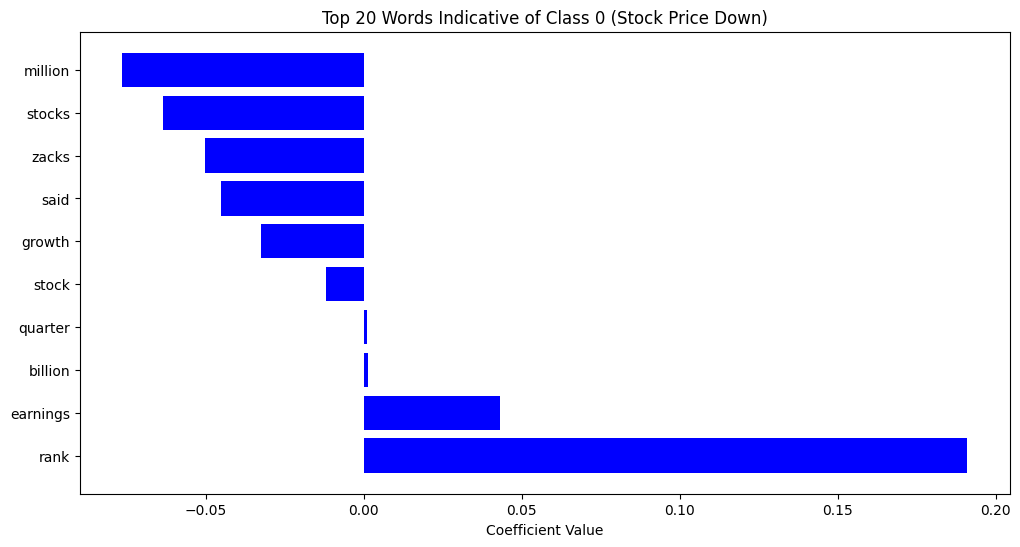

In [30]:

# Plotting the most indicative words for Class 0
plt.figure(figsize=(12, 6))
plt.barh([vectorizer.get_feature_names_out()[i] for i in top_features_class_0], clf.coef_[0][top_features_class_0], color='blue')
plt.title('Top 20 Words Indicative of Class 0 (Stock Price Down)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

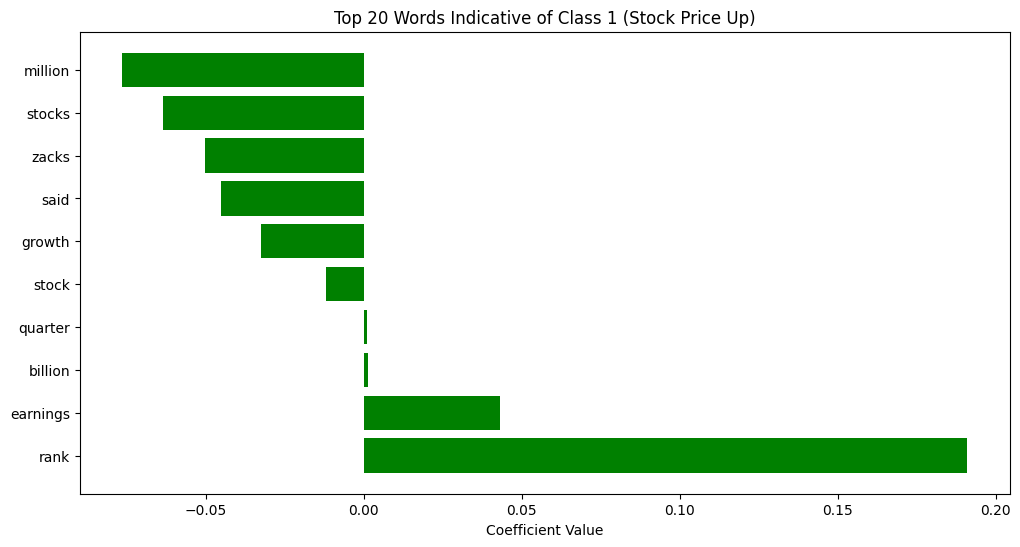

In [31]:

# Plotting the most indicative words for Class 1
plt.figure(figsize=(12, 6))
plt.barh([vectorizer.get_feature_names_out()[i] for i in top_features_class_1], clf.coef_[0][top_features_class_1], color='green')
plt.title('Top 20 Words Indicative of Class 1 (Stock Price Up)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

In [32]:
# Check the shape of the tfidf_matrix
print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")

# Number of documents (rows) and terms (columns)
num_documents, num_features = tfidf_matrix.shape
print(f"Number of documents: {num_documents}")
print(f"Number of features (terms): {num_features}")

# Check the number of non-zero elements
non_zero_elements = tfidf_matrix.nnz
print(f"Number of non-zero elements: {non_zero_elements}")

# Calculate the total number of elements
total_elements = num_documents * num_features
print(f"Total number of elements: {total_elements}")

# Calculate the sparsity of the matrix
sparsity = (1 - (non_zero_elements / total_elements)) * 100
print(f"Sparsity of the tfidf_matrix: {sparsity:.2f}%")


Shape of tfidf_matrix: (197393, 10)
Number of documents: 197393
Number of features (terms): 10
Number of non-zero elements: 830197
Total number of elements: 1973930
Sparsity of the tfidf_matrix: 57.94%


In [33]:
# Compute cosine similarity matrix, which measures the similarity between documents
# Source: https://medium.com/@anurag-jain/tf-idf-vectorization-with-cosine-similarity-eca3386d4423
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert similarity matrix to a DataFrame for easier handling
similarity_df = pd.DataFrame(similarity_matrix)

MemoryError: Unable to allocate 197. GiB for an array with shape (26447601866,) and data type int64

In [20]:
# Check the shape of the tfidf_matrix
print(f"Shape of tfidf_matrix: {tfidf_matrix.shape}")

# Number of documents (rows) and terms (columns)
num_documents, num_features = tfidf_matrix.shape
print(f"Number of documents: {num_documents}")
print(f"Number of features (terms): {num_features}")

# Check the number of non-zero elements
non_zero_elements = tfidf_matrix.nnz
print(f"Number of non-zero elements: {non_zero_elements}")

# Calculate the total number of elements
total_elements = num_documents * num_features
print(f"Total number of elements: {total_elements}")

# Calculate the sparsity of the matrix
sparsity = (1 - (non_zero_elements / total_elements)) * 100
print(f"Sparsity of the tfidf_matrix: {sparsity:.2f}%")


Shape of tfidf_matrix: (3111, 500)
Number of documents: 3111
Number of features (terms): 500
Number of non-zero elements: 336646
Total number of elements: 1555500
Sparsity of the tfidf_matrix: 78.36%


In [ ]:
# Function to compute cosine similarity in batches
def compute_similarity_in_batches(tfidf_matrix, batch_size=1000):
    num_docs = tfidf_matrix.shape[0]
    similarity_results = []
    
    # Process the similarity computation in batches
    for start in range(0, num_docs, batch_size):
        end = min(start + batch_size, num_docs)
        print(f"Processing batch: {start} to {end}")
        
        # Compute similarities for the batch
        batch_similarity = cosine_similarity(tfidf_matrix[start:end], tfidf_matrix)
        
        # Convert to a sparse matrix to save memory (optional)
        batch_similarity_sparse = pd.DataFrame(batch_similarity)
        
        # Append the results
        similarity_results.append(batch_similarity_sparse)
    
    # Combine all batches into one DataFrame
    return pd.concat(similarity_results, axis=0)

# Using the function to compute the similarity matrix in smaller chunks
similarity_df = compute_similarity_in_batches(tfidf_matrix, batch_size=500)

# Display the shape to confirm the complete matrix
print(f"Computed similarity matrix shape: {similarity_df.shape}")


In [13]:
# Find indices of the most and least similar documents (excluding self-similarity)
np.fill_diagonal(similarity_matrix, 0)
most_similar_indices = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
least_similar_indices = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)

NameError: name 'similarity_matrix' is not defined

In [0]:

# Inspect the most similar documents
similar_doc_1 = news_df.iloc[most_similar_indices[0]]
similar_doc_2 = news_df.iloc[most_similar_indices[1]]

print("\nMost Similar Documents:\n")
print("Document 1:")
print(similar_doc_1['content'])
print("\nDocument 2:")
print(similar_doc_2['content'])

In [10]:

# Inspect the least similar documents
dissimilar_doc_1 = news_df.iloc[least_similar_indices[0]]
dissimilar_doc_2 = news_df.iloc[least_similar_indices[1]]

print("\n\nMost Dissimilar Documents:\n")
print("Document 1:")
print(dissimilar_doc_1['content'])
print("\nDocument 2:")
print(dissimilar_doc_2['content'])



'\n\n# TF-IDF Representation of Documents using the processed and filtered text\nvectorizer = TfidfVectorizer(stop_words=\'english\', max_features=10)\ntfidf_matrix = vectorizer.fit_transform(news_df[\'filtered_text_str\'])\n\n# Compute cosine similarity matrix\nsimilarity_matrix = cosine_similarity(tfidf_matrix)\n\n# Convert similarity matrix to a DataFrame for easier handling\nsimilarity_df = pd.DataFrame(similarity_matrix)\n\n# Find indices of the most and least similar documents (excluding self-similarity)\nnp.fill_diagonal(similarity_matrix, 0)\nmost_similar_indices = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)\nleast_similar_indices = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)\n\n# Inspect the most similar documents\nsimilar_doc_1 = news_df.iloc[most_similar_indices[0]]\nsimilar_doc_2 = news_df.iloc[most_similar_indices[1]]\n\nprint("\nMost Similar Documents:\n")\nprint("Document 1:")\nprint(similar_do